In [1]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score

# Load your dataset
data = pd.read_csv("D:/Projects/Bird-Song-Classification/bird-song-classifier/Spectrogram_Features_data.csv")

# Select columns for training the model
selected_columns = ['mean', 'median', 'std_dev', 'minimum', 'maximum', 'species', 'name']  # Include 'species' and 'name'
selected_data = data[selected_columns]

# Drop 'species' and 'name' columns before scaling
selected_data_features = selected_data.drop(columns=['species', 'name'])

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data_features)

n_components = 5

# Initialize Gaussian Mixture Model
gmm = GaussianMixture(n_components=n_components)
gmm.fit(scaled_data)

# Predict using the trained model
predictions = gmm.predict(scaled_data)

# Add predictions to the DataFrame
data['cluster'] = predictions

print(data[['species', 'name', 'cluster']])  # Display 'species', 'name', and 'cluster' columns

# Assuming you have true labels in 'species' column
true_labels = data['species']

# Calculate Adjusted Rand Index
ari = adjusted_rand_score(true_labels, predictions)
print("Adjusted Rand Index:", ari)


         species               name  cluster
0       bewickii      Bewick's Wren        4
1       bewickii      Bewick's Wren        4
2       bewickii      Bewick's Wren        4
3       bewickii      Bewick's Wren        4
4       bewickii      Bewick's Wren        4
...          ...                ...      ...
5417  cardinalis  Northern Cardinal        4
5418  cardinalis  Northern Cardinal        4
5419  cardinalis  Northern Cardinal        1
5420  cardinalis  Northern Cardinal        4
5421  cardinalis  Northern Cardinal        1

[5422 rows x 3 columns]
Adjusted Rand Index: 0.033217793111462404


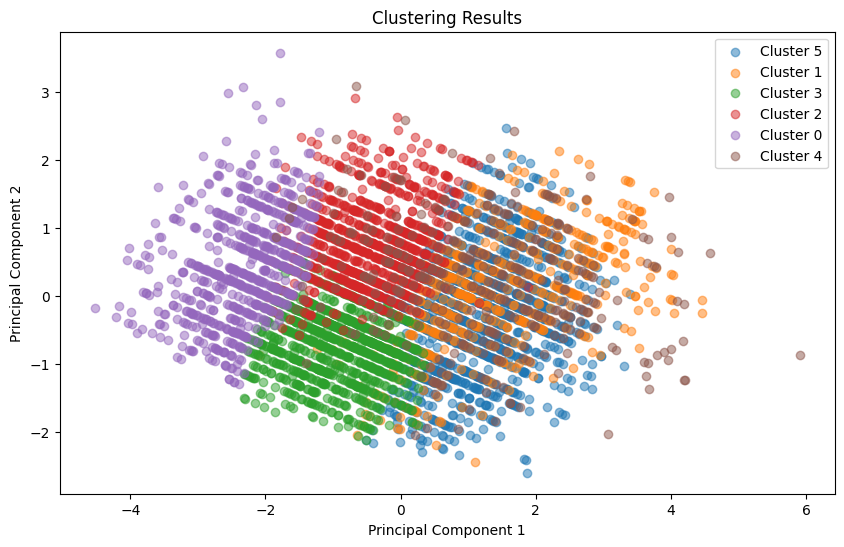

In [2]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)  # You can adjust the number of components
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = predictions

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in pca_df['Cluster'].unique():
    plt.scatter(pca_df.loc[pca_df['Cluster'] == cluster, 'PC1'],
                pca_df.loc[pca_df['Cluster'] == cluster, 'PC2'],
                label=f'Cluster {cluster}',
                alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Results')
plt.legend()
plt.show()
